__This project involves the analysis of historical data of flooding events in Lagos state with the aim of predicting the next flooding date after the 3rd of July. The dataset used contained weather information of days spanning from 2004 to 2024__

In [6]:
# importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# dataframe
df = pd.read_excel('/content/drive/MyDrive/Data Science and Analytics/Projects /HNG/Stage 2 Task/New Lagos Weather Data.csv')

In [8]:
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin
0,Lagos,5/13/2004,31.7,28.2,30.0,38.9,32.6,35.8,24.9,74.7,...,NaN,2004-05-13T06:30:34,2004-05-13T18:55:02,0.80,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
1,Lagos,5/14/2004,26.6,25.7,26.3,26.6,25.7,26.3,25.9,97.5,...,NaN,2004-05-14T06:30:27,2004-05-14T18:55:10,0.83,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
2,Lagos,5/15/2004,25.1,25.1,25.1,25.1,25.1,25.1,25.1,100.0,...,NaN,2004-05-15T06:30:20,2004-05-15T18:55:18,0.87,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
3,Lagos,5/16/2004,22.9,22.9,22.9,22.9,22.9,22.9,22.2,95.8,...,NaN,2004-05-16T06:30:14,2004-05-16T18:55:27,0.90,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
4,Lagos,5/17/2004,31.4,25.1,28.6,38.7,25.1,33.6,25.5,84.2,...,NaN,2004-05-17T06:30:08,2004-05-17T18:55:36,0.94,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7357 entries, 0 to 7356
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              7357 non-null   object 
 1   datetime          7357 non-null   object 
 2   tempmax           7021 non-null   float64
 3   tempmin           7021 non-null   float64
 4   temp              7021 non-null   float64
 5   feelslikemax      7021 non-null   float64
 6   feelslikemin      7021 non-null   float64
 7   feelslike         7021 non-null   float64
 8   dew               7021 non-null   float64
 9   humidity          7021 non-null   float64
 10  precip            7021 non-null   float64
 11  precipprob        7021 non-null   float64
 12  precipcover       7357 non-null   float64
 13  preciptype        3340 non-null   object 
 14  flood occurrence  3481 non-null   float64
 15  windgust          5420 non-null   float64
 16  windspeed         6991 non-null   float64


In [9]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'flood occurrence', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin'],
      dtype='object')

In [10]:
# renaming some columns in the dataframe
df.columns = ['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'flood_occurrence', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin']

In [ ]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'flood_occurrence', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin'],
      dtype='object')

### Data Cleaning

In [11]:
# filtering some columns from the old dataframe to create a new dataframe
weather_df = df.filter(['datetime','precip','precipprob',  'precipcover', 'preciptype','windgust', 'windspeed', 'winddir', 'tempmax', 'tempmin', 'temp','dew', 'humidity', 'sealevelpressure', 'moonphase', 'flood_occurence'] , axis=1)
weather_df.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,5/13/2004,0.0,0.0,0.0,NaN,NaN,20.5,128.2,31.7,28.2,30.0,24.9,74.7,NaN,0.80
1,5/14/2004,0.0,0.0,0.0,NaN,NaN,20.5,280.4,26.6,25.7,26.3,25.9,97.5,NaN,0.83
2,5/15/2004,0.0,0.0,0.0,NaN,NaN,16.6,180.0,25.1,25.1,25.1,25.1,100.0,NaN,0.87
3,5/16/2004,0.0,0.0,0.0,NaN,NaN,11.2,350.0,22.9,22.9,22.9,22.2,95.8,NaN,0.90
4,5/17/2004,0.0,0.0,0.0,NaN,NaN,31.3,242.3,31.4,25.1,28.6,25.5,84.2,NaN,0.94


In [12]:
# fill null values in the precipitation type with "no_rain"
weather_df.preciptype.fillna('no_rain', inplace=True)
weather_df.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,5/13/2004,0.0,0.0,0.0,no_rain,NaN,20.5,128.2,31.7,28.2,30.0,24.9,74.7,NaN,0.80
1,5/14/2004,0.0,0.0,0.0,no_rain,NaN,20.5,280.4,26.6,25.7,26.3,25.9,97.5,NaN,0.83
2,5/15/2004,0.0,0.0,0.0,no_rain,NaN,16.6,180.0,25.1,25.1,25.1,25.1,100.0,NaN,0.87
3,5/16/2004,0.0,0.0,0.0,no_rain,NaN,11.2,350.0,22.9,22.9,22.9,22.2,95.8,NaN,0.90
4,5/17/2004,0.0,0.0,0.0,no_rain,NaN,31.3,242.3,31.4,25.1,28.6,25.5,84.2,NaN,0.94


In [13]:
# get the median wind gust
median = weather_df.windgust.median()

In [14]:
 # fill null values in the wind gust column with the median value
 weather_df.windgust.fillna(median, inplace=True)

In [15]:
#  get the median sea level pressure
median = weather_df.sealevelpressure.median()
median

1011.9

In [16]:
# fill null values with the median value
weather_df.sealevelpressure.fillna(median, inplace=True)

In [17]:
weather_df.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,5/13/2004,0.0,0.0,0.0,no_rain,28.1,20.5,128.2,31.7,28.2,30.0,24.9,74.7,1011.9,0.80
1,5/14/2004,0.0,0.0,0.0,no_rain,28.1,20.5,280.4,26.6,25.7,26.3,25.9,97.5,1011.9,0.83
2,5/15/2004,0.0,0.0,0.0,no_rain,28.1,16.6,180.0,25.1,25.1,25.1,25.1,100.0,1011.9,0.87
3,5/16/2004,0.0,0.0,0.0,no_rain,28.1,11.2,350.0,22.9,22.9,22.9,22.2,95.8,1011.9,0.90
4,5/17/2004,0.0,0.0,0.0,no_rain,28.1,31.3,242.3,31.4,25.1,28.6,25.5,84.2,1011.9,0.94


In [18]:
flood_occurence = df.flood_occurrence
flood_occurence.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: flood_occurrence, dtype: float64

In [19]:
# fill null values in flood occurence with 0
flood_occurence.fillna(0, inplace=True)

In [20]:
round(weather_df.isna().sum()/weather_df.shape[0], 2)

datetime            0.00
precip              0.05
precipprob          0.05
precipcover         0.00
preciptype          0.00
windgust            0.00
windspeed           0.05
winddir             0.10
tempmax             0.05
tempmin             0.05
temp                0.05
dew                 0.05
humidity            0.05
sealevelpressure    0.00
moonphase           0.05
dtype: float64

__The remaining null values contribute a small percentage, so we'll drop them__

In [ ]:
weather_df.dropna(inplace=True)

In [ ]:
weather_df.isna().sum()

datetime            0
precip              0
precipprob          0
precipcover         0
preciptype          0
windgust            0
windspeed           0
winddir             0
tempmax             0
tempmin             0
temp                0
dew                 0
humidity            0
sealevelpressure    0
moonphase           0
flood_occurence     0
dtype: int64

__All null values have been taken care of__

In [ ]:
# add flood occurence to the new dataframe
weather_df['flood_occurence'] = flood_occurence

In [ ]:
weather_df.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flood_occurence
0,5/13/2004,0.0,0.0,0.0,no_rain,28.1,20.5,128.2,31.7,28.2,30.0,24.9,74.7,1011.9,0.80,0.0
1,5/14/2004,0.0,0.0,0.0,no_rain,28.1,20.5,280.4,26.6,25.7,26.3,25.9,97.5,1011.9,0.83,0.0
2,5/15/2004,0.0,0.0,0.0,no_rain,28.1,16.6,180.0,25.1,25.1,25.1,25.1,100.0,1011.9,0.87,0.0
3,5/16/2004,0.0,0.0,0.0,no_rain,28.1,11.2,350.0,22.9,22.9,22.9,22.2,95.8,1011.9,0.90,0.0
4,5/17/2004,0.0,0.0,0.0,no_rain,28.1,31.3,242.3,31.4,25.1,28.6,25.5,84.2,1011.9,0.94,0.0


In [ ]:
# convert the date column to datetime format
datetime = pd.to_datetime(weather_df['datetime'])

In [ ]:
weather_df.isna().sum()

precip              0
precipprob          0
precipcover         0
preciptype          0
windgust            0
windspeed           0
winddir             0
tempmax             0
tempmin             0
temp                0
dew                 0
humidity            0
sealevelpressure    0
moonphase           0
flood_occurence     0
year                0
month               0
day                 0
dtype: int64

In [ ]:
# saving the cleaned version of the dataframe
weather_df.to_csv('CLEANED LAGOS WEATHER DATASET.csv', index=False)

### Feature Engineering

In [ ]:
# extract the day, month and year and add them as new columns to the dataframe
weather_df['year'] = datetime.dt.year
weather_df['month'] = datetime.dt.month
weather_df['day'] = datetime.dt.day

In [ ]:
weather_df.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flood_occurence,year,month,day
0,5/13/2004,0.0,0.0,0.0,no_rain,28.1,20.5,128.2,31.7,28.2,30.0,24.9,74.7,1011.9,0.80,0.0,2004,5,13
1,5/14/2004,0.0,0.0,0.0,no_rain,28.1,20.5,280.4,26.6,25.7,26.3,25.9,97.5,1011.9,0.83,0.0,2004,5,14
2,5/15/2004,0.0,0.0,0.0,no_rain,28.1,16.6,180.0,25.1,25.1,25.1,25.1,100.0,1011.9,0.87,0.0,2004,5,15
3,5/16/2004,0.0,0.0,0.0,no_rain,28.1,11.2,350.0,22.9,22.9,22.9,22.2,95.8,1011.9,0.90,0.0,2004,5,16
4,5/17/2004,0.0,0.0,0.0,no_rain,28.1,31.3,242.3,31.4,25.1,28.6,25.5,84.2,1011.9,0.94,0.0,2004,5,17


In [ ]:
weather_df.drop(['datetime'], axis=1, inplace=True)

### Correlation

In [ ]:
corr = weather_df.corr(numeric_only=True)

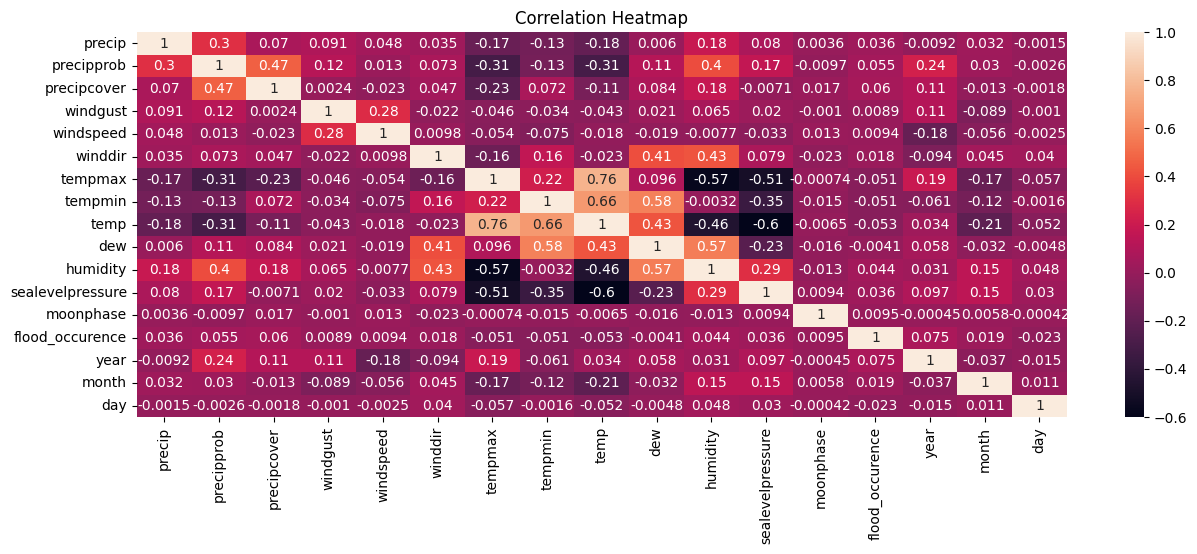

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True)
plt.show()

1. There's a positive relationship between precipitation probability and precipitation cover.
2. There's also a positive relationship between wind direction, humidity, temperature and dew.
3. There  a weak positive relationship between maximum temperature and the year.
4. Humidity was also found to be moderately positively correlated with precipitation probability.

In [ ]:
# replacing 0 and 1 in the flood occurence column with 'no_flood' and 'flood'
weather_df.flood_occurence.replace(0, 'no_flood', inplace=True)
weather_df.flood_occurence.replace(1, 'flood', inplace=True)

### EDA

In [ ]:
flood_df = weather_df[weather_df['flood_occurence'] == 'flood']

In [ ]:
flood_df

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flood_occurence,year,month,day
92,0.0,0.0,0.00,no_rain,28.1,33.5,232.3,27.1,22.6,25.4,22.3,83.6,1014.9,0.92,flood,2004,8,13
394,145.0,100.0,8.33,rain,28.1,18.4,279.5,28.1,22.1,23.8,22.9,95.1,1012.3,0.15,flood,2005,11,6
395,34.0,100.0,4.17,rain,28.1,22.3,340.0,24.9,22.7,23.6,23.2,98.1,1011.9,0.18,flood,2005,12,6
451,0.0,0.0,0.00,no_rain,28.1,29.5,247.3,26.1,24.1,25.1,22.1,83.5,1014.3,0.08,flood,2005,7,8
2230,17.1,100.0,100.00,rain,28.1,18.7,224.1,27.6,27.1,27.3,24.7,85.9,1011.9,0.32,flood,2010,6,21
2614,1.0,100.0,4.17,rain,25.9,29.5,229.9,26.0,22.0,24.2,23.3,95.0,1014.2,0.33,flood,2011,10,7
3350,0.1,100.0,4.17,rain,24.1,14.8,230.2,28.1,24.0,25.6,24.1,91.6,1015.0,0.25,flood,2013,7,15
4804,18.1,100.0,8.33,rain,25.9,14.8,247.9,25.1,24.0,24.6,23.8,95.5,1015.2,0.48,flood,2017,8,7
5068,3.5,100.0,25.00,rain,30.6,18.4,206.6,35.0,26.6,28.4,25.2,83.6,1009.8,0.43,flood,2018,3,29
5356,0.0,0.0,0.00,no_rain,27.0,20.5,186.4,35.0,25.0,28.9,25.0,81.1,1011.0,0.18,flood,2019,11,1


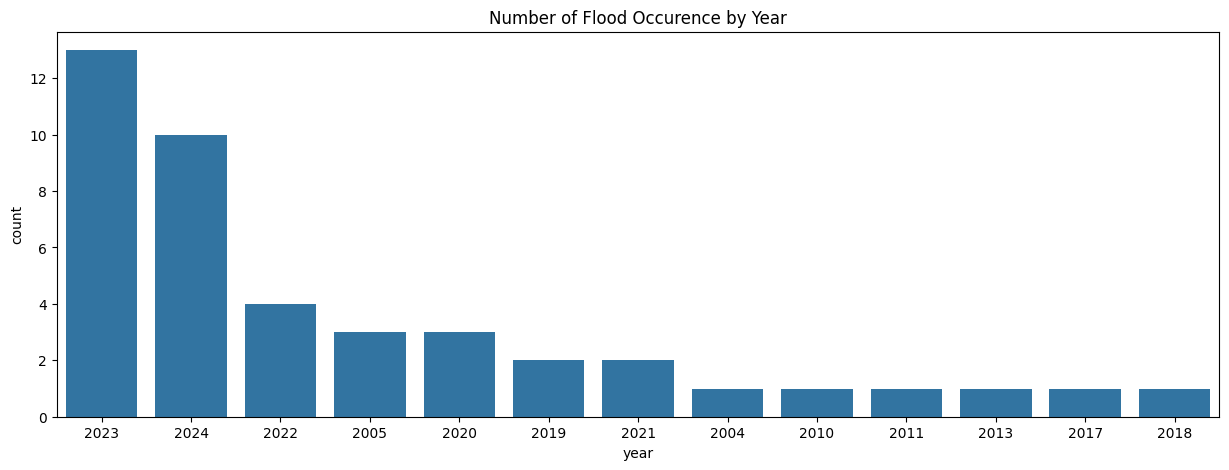

In [ ]:
# show the trend of flood occurence by year
plt.figure(figsize=(15,5))
plt.title('Number of Flood Occurence by Year')
sns.countplot(x='year', data=flood_df, order=flood_df['year'].value_counts().index)
plt.show()

__2023 was found to be the year with the highest record of flooding, this was followed closely by 2024. This implies that measures need to be taken to mitigate subsequent flooding events in 2024 as the year already has a higher flooding record than many past years.__

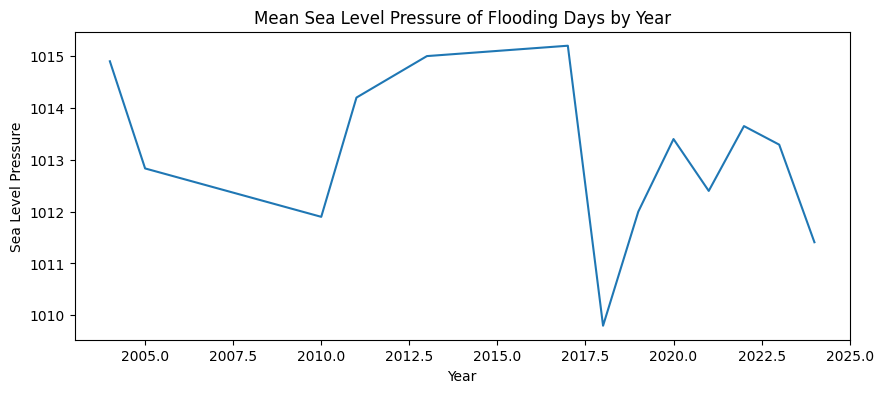

In [ ]:
plt.figure(figsize=(10,4))
x = flood_df.groupby("year")["sealevelpressure"].mean()
sns.lineplot(x=x.index, y=x.values)
plt.title('Mean Sea Level Pressure of Flooding Days by Year')
plt.xlabel('Year')
plt.ylabel('Sea Level Pressure')
plt.show()

In [ ]:
flood_df["sealevelpressure"].mean()

1012.7906976744187

__On flooding days, the average Sea level pressure was found to be 1012.79.__

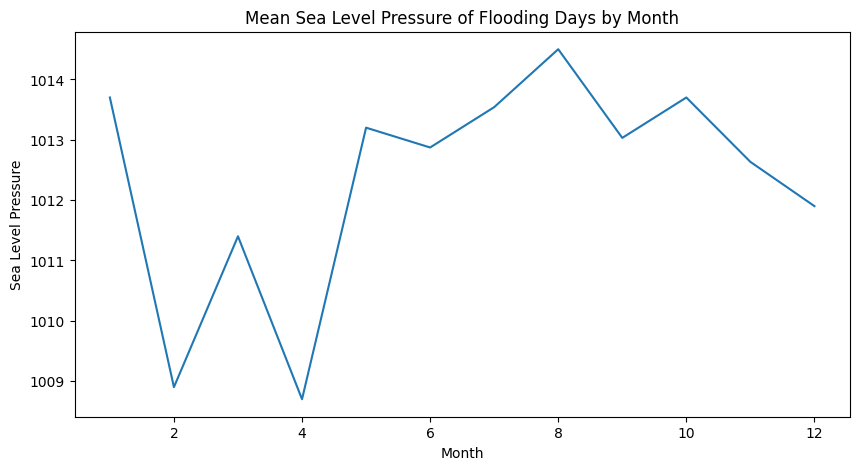

In [ ]:

plt.figure(figsize=(10,5))
x = flood_df.groupby("month")["sealevelpressure"].mean()
sns.lineplot(x=x.index, y=x.values)
plt.title('Mean Sea Level Pressure of Flooding Days by Month')
plt.xlabel('Month')
plt.ylabel('Sea Level Pressure')
plt.show()

__The highest Sea level pressure were recorded in 2017 and in the Month of August__

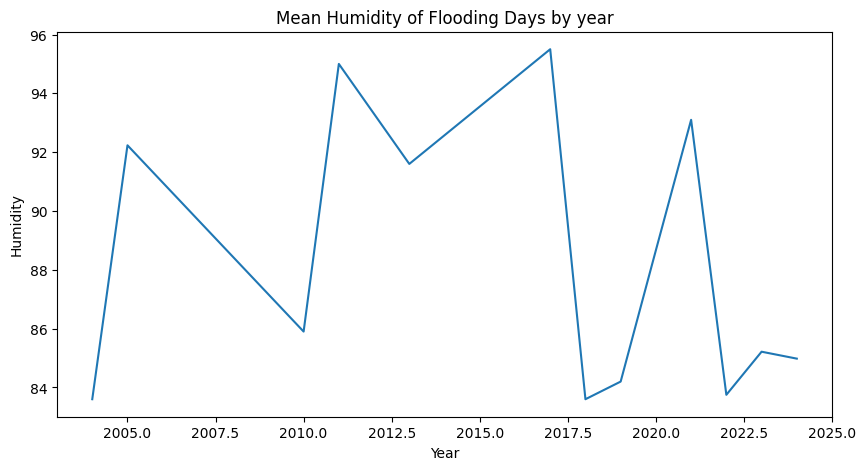

In [ ]:
plt.figure(figsize=(10,5))
x = flood_df.groupby("year")["humidity"].mean()
sns.lineplot(x=x.index, y=x.values)
plt.title('Mean Humidity of Flooding Days by year')
plt.xlabel('Year')
plt.ylabel('Humidity')
plt.show()

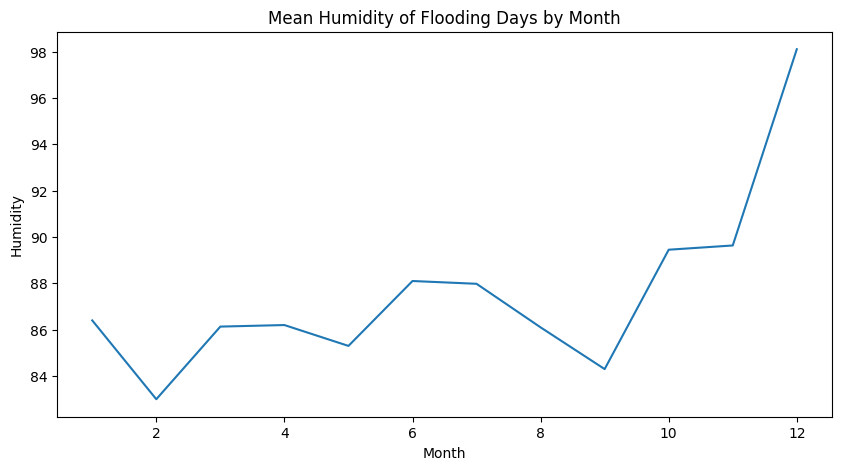

In [ ]:
plt.figure(figsize=(10,5))
x = flood_df.groupby("month")["humidity"].mean()
sns.lineplot(x=x.index, y=x.values)
plt.title('Mean Humidity of Flooding Days by Month')
plt.xlabel('Month')
plt.ylabel('Humidity')
plt.show()

__On flooding days, the average humidity was found to be 86.63. The highest values for humidity were recorded in 2010 and at the middle of 2017. It could be observed that the level of humidity rose significantly between November and December.__



In [ ]:
# average humidity
flood_df.humidity.mean()

86.63023255813954

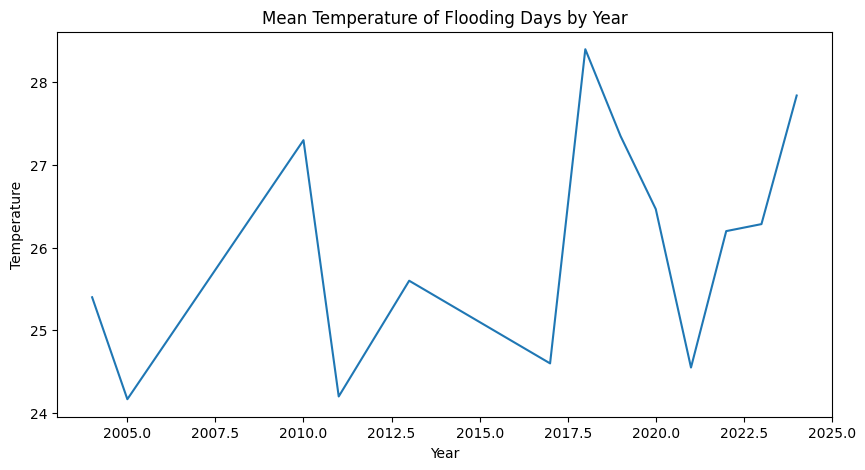

In [ ]:
plt.figure(figsize=(10,5))
x = flood_df.groupby("year")["temp"].mean()
sns.lineplot(x=x.index, y=x.values)
plt.title('Mean Temperature of Flooding Days by Year')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

In [ ]:
# Average temperature
flood_df.temp.mean()

26.42093023255814

__The average temperature was found to be 26.42 degrees on days where flooding occurred.__

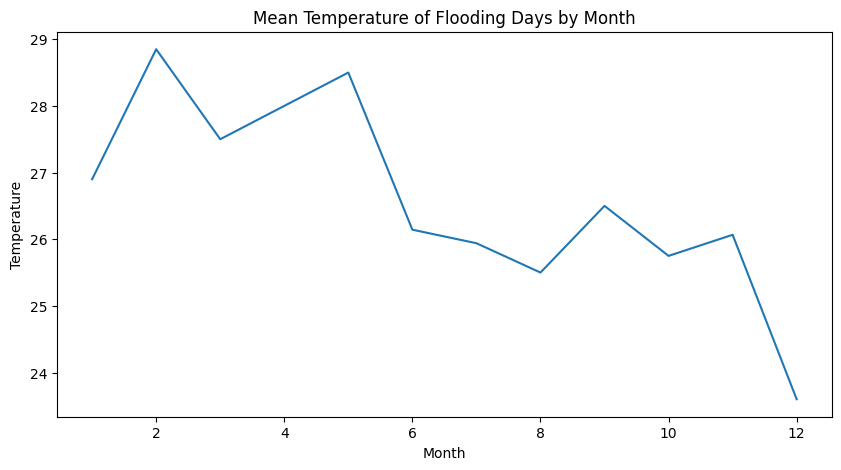

In [ ]:
plt.figure(figsize=(10,5))
x = flood_df.groupby("month")["temp"].mean()
sns.lineplot(x=x.index, y=x.values)
plt.title('Mean Temperature of Flooding Days by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

__The temperature was found to reduce between June and August, as this period falls in the rainy season. The temperature was also observed to drop significantly between November and December. This is most likely as a result of the Harmattan__

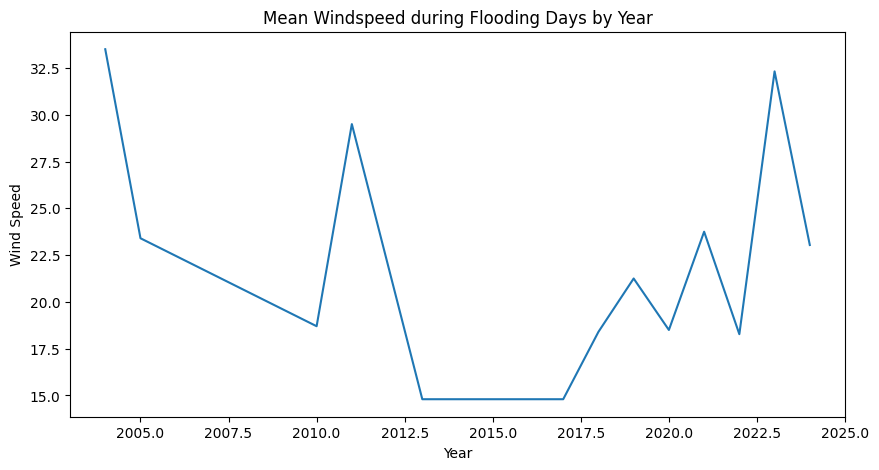

In [ ]:
plt.figure(figsize=(10,5))
x = flood_df.groupby("year")["windspeed"].mean()
sns.lineplot(x=x.index, y=x.values)
plt.title('Mean Windspeed during Flooding Days by Year')
plt.xlabel('Year')
plt.ylabel('Wind Speed')
plt.show()

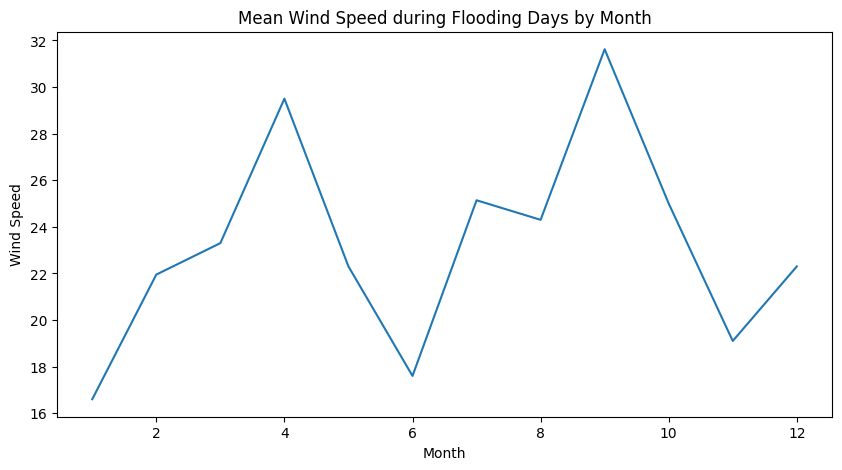

In [ ]:
plt.figure(figsize=(10,5))
x = flood_df.groupby("month")["windspeed"].mean()
sns.lineplot(x=x.index, y=x.values)
plt.title('Mean Wind Speed during Flooding Days by Month')
plt.xlabel('Month')
plt.ylabel('Wind Speed')
plt.show()

### Categorical Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
weather_df['preciptype'] = encoder.fit_transform(weather_df['preciptype'])

In [ ]:
weather_df.head()

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flood_occurence,year,month,day
0,0.0,0.0,0.0,0,28.1,20.5,128.2,31.7,28.2,30.0,24.9,74.7,1011.9,0.80,no_flood,2004,5,13
1,0.0,0.0,0.0,0,28.1,20.5,280.4,26.6,25.7,26.3,25.9,97.5,1011.9,0.83,no_flood,2004,5,14
2,0.0,0.0,0.0,0,28.1,16.6,180.0,25.1,25.1,25.1,25.1,100.0,1011.9,0.87,no_flood,2004,5,15
3,0.0,0.0,0.0,0,28.1,11.2,350.0,22.9,22.9,22.9,22.2,95.8,1011.9,0.90,no_flood,2004,5,16
4,0.0,0.0,0.0,0,28.1,31.3,242.3,31.4,25.1,28.6,25.5,84.2,1011.9,0.94,no_flood,2004,5,17


### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
cols_to_scale = ['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'precip',	'precipprob',	'precipcover']

In [ ]:
weather_df[cols_to_scale] = scaler.fit_transform(weather_df[cols_to_scale])

### Defining x_train and y_train

In [ ]:
x_train = weather_df.drop(['flood_occurence', 'year', 'day', 'month'], axis=1)
y_train = weather_df['flood_occurence']

### Resampling

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
Counter(y_train)

Counter({'no_flood': 6600, 'flood': 43})

In [ ]:
undersampler = RandomUnderSampler()

In [ ]:
x_train_res, y_train_res = undersampler.fit_resample(x_train, y_train)

In [ ]:
x_train_res

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,-0.276042,-0.907467,-0.422498,0,-0.124897,0.867535,0.275960,-1.626762,-0.978817,-1.299822,-0.864101,0.133193,1.622162,0.92
1,7.528545,1.101968,0.179745,1,-0.124897,-0.444550,1.259647,-1.237168,-1.241901,-2.312818,-0.556765,1.715822,0.165852,0.15
2,1.553999,1.101968,-0.121015,1,-0.124897,-0.105667,2.520517,-2.483867,-0.926200,-2.439442,-0.403097,2.128682,-0.058196,0.18
3,-0.276042,-0.907467,-0.422498,0,-0.124897,0.519962,0.588572,-2.016355,-0.189565,-1.489758,-0.966547,0.119431,1.286090,0.08
4,0.644361,1.101968,6.807303,1,-0.124897,-0.418482,0.105065,-1.431965,1.388940,-0.096889,0.365244,0.449719,-0.058196,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,-0.173775,1.101968,1.384952,1,2.239079,0.050740,0.096728,-0.107348,-0.294798,-0.286826,0.109131,0.339623,0.950019,0.95
82,-0.265277,1.101968,0.179745,1,-2.575228,-0.731297,0.217605,-0.107348,-0.189565,-0.160201,0.518913,0.724959,-0.618315,0.77
83,-0.259894,1.101968,0.179745,1,0.026225,0.207148,0.046710,-0.107348,-0.768350,-0.413450,0.365244,0.876341,0.950019,0.62
84,-0.222217,1.101968,-0.121015,1,-0.243635,-0.852947,-0.207548,-1.276128,-0.242182,-0.666699,0.467690,1.261676,-0.002184,0.61


In [ ]:
Counter(y_train_res)

Counter({'flood': 43, 'no_flood': 43})

### Model Selection and Training


In [ ]:
# import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
rf = RandomForestClassifier()
xgb = XGBClassifier()

### Logistic Regression

In [ ]:
log_reg.fit(x_train_res, y_train_res)

LogisticRegression()

In [ ]:
predy = log_reg.predict(x_train_res)

In [ ]:
confusion_matrix(y_train_res, predy)

array([[30, 13],
       [11, 32]])

In [ ]:
print(classification_report(y_train_res, predy))

              precision    recall  f1-score   support

       flood       0.73      0.70      0.71        43
    no_flood       0.71      0.74      0.73        43

    accuracy                           0.72        86
   macro avg       0.72      0.72      0.72        86
weighted avg       0.72      0.72      0.72        86



### SVC

In [ ]:
svc.fit(x_train_res, y_train_res)

SVC()

In [ ]:
predy = svc.predict(x_train_res)

In [ ]:
confusion_matrix(y_train_res, predy)

array([[34,  9],
       [13, 30]])

In [ ]:
print(classification_report(y_train_res, predy))

              precision    recall  f1-score   support

       flood       0.72      0.79      0.76        43
    no_flood       0.77      0.70      0.73        43

    accuracy                           0.74        86
   macro avg       0.75      0.74      0.74        86
weighted avg       0.75      0.74      0.74        86



### Random Forest

In [ ]:
rf.fit(x_train_res, y_train_res)

RandomForestClassifier()

In [ ]:
predy = rf.predict(x_train_res)

In [ ]:
confusion_matrix(y_train_res, predy)

array([[43,  0],
       [ 0, 43]])

In [ ]:
print(classification_report(y_train_res, predy))

              precision    recall  f1-score   support

       flood       1.00      1.00      1.00        43
    no_flood       1.00      1.00      1.00        43

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



In [ ]:
# Random Forest is the best performing model

### Evaluating Model on Test Data

__The model was used to predict the next days of flooding events in Lagos State using the weather forecast data of 5th to 11th July, 2024__

In [ ]:
# importing the text data
test_df = pd.read_csv('/content/drive/MyDrive/Data Science and Analytics/Projects /HNG/Stage 2 Task/Future Weather Forecast.csv')

In [ ]:
test_df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"lagos,Nigeria",7/5/2024,30.0,24.0,27.4,36.1,24.0,30.3,24.3,83.1,...,20.1,8,30,2024-07-05T06:36:42,2024-07-05T19:05:41,0.00,"Rain, Partially cloudy",Partly cloudy throughout the day with storms p...,rain,"DNMM,remote"
1,"lagos,Nigeria",7/6/2024,27.3,26.5,26.8,30.0,26.5,27.8,23.1,80.1,...,20.7,8,30,2024-07-06T06:36:55,2024-07-06T19:05:48,0.02,"Rain, Overcast",Cloudy skies throughout the day with storms po...,rain,NaN
2,"lagos,Nigeria",7/7/2024,26.9,26.0,26.4,29.3,26.0,26.9,22.8,80.6,...,16.3,7,10,2024-07-07T06:37:08,2024-07-07T19:05:54,0.05,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN
3,"lagos,Nigeria",7/8/2024,26.3,25.2,25.7,26.3,25.2,25.7,22.9,84.4,...,5.2,3,10,2024-07-08T06:37:21,2024-07-08T19:05:59,0.08,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN
4,"lagos,Nigeria",7/9/2024,26.9,24.8,25.9,29.3,24.8,26.2,22.8,83.0,...,18.8,8,10,2024-07-09T06:37:34,2024-07-09T19:06:04,0.11,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,NaN
5,"lagos,Nigeria",7/10/2024,25.9,25.1,25.5,25.9,25.1,25.5,22.8,84.9,...,15.7,6,10,2024-07-10T06:37:47,2024-07-10T19:06:08,0.15,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN
6,"lagos,Nigeria",7/11/2024,25.6,23.8,24.6,25.6,23.8,24.6,22.8,90.1,...,1.2,0,10,2024-07-11T06:37:59,2024-07-11T19:06:11,0.18,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN


__Repeating all the preprocessing steps carried out on the training data on the test dataset__

In [ ]:
new_test_df = test_df.filter(['precip', 'precipprob', 'precipcover', 'preciptype', 'windgust',
       'windspeed', 'winddir', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity',
       'sealevelpressure', 'moonphase'])

In [ ]:
new_test_df.head()

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,3.3,100.0,50.00,rain,24.8,22.3,241.4,30.0,24.0,27.4,24.3,83.1,1014.1,0.00
1,5.9,71.0,54.17,rain,31.0,27.7,225.8,27.3,26.5,26.8,23.1,80.1,1012.7,0.02
2,5.9,74.2,54.17,rain,32.0,29.9,237.2,26.9,26.0,26.4,22.8,80.6,1012.9,0.05
3,24.0,90.3,100.00,rain,30.6,23.8,252.9,26.3,25.2,25.7,22.9,84.4,1012.8,0.08
4,16.0,90.3,95.83,rain,32.8,31.7,247.3,26.9,24.8,25.9,22.8,83.0,1012.3,0.11


In [ ]:
# feature scaling
cols_to_scale = ['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'precip',	'precipprob',	'precipcover']

In [ ]:
new_test_df[cols_to_scale] = scaler.transform(new_test_df[cols_to_scale])

In [ ]:
scale = ['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'windgust', 'windspeed', 'winddir', 'sealevelpressure']

In [ ]:
new_test_df[scale] = scaler.fit_transform(new_test_df[scale])

In [ ]:
new_test_df.head()

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,-0.281339,-0.885324,-0.191693,1,-2.222015,-1.502236,-0.137369,2.231836,-1.165680,1.596695,2.400026,-0.208889,1.434211,0.00
1,-0.273807,-0.897034,-0.169897,1,-0.059785,0.223737,-1.881635,0.232703,1.590995,0.890788,0.055815,-1.183706,-0.728138,0.02
2,-0.273807,-0.895742,-0.169897,1,0.288962,0.926912,-0.606979,-0.063465,1.039660,0.420183,-0.530238,-1.021236,-0.419231,0.05
3,-0.221369,-0.889241,0.069657,1,-0.199284,-1.022799,1.148469,-0.507716,0.157524,-0.403376,-0.334887,0.213531,-0.573685,0.08
4,-0.244546,-0.889241,0.047860,1,0.567959,1.502236,0.522322,-0.063465,-0.283544,-0.168073,-0.530238,-0.241383,-1.345952,0.11


In [ ]:
# encoding
new_test_df['preciptype'] = encoder.transform(new_test_df['preciptype'])

In [ ]:
new_test_df

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,-0.281339,-0.885324,-0.191693,1,-2.222015,-1.502236,-0.137369,2.231836,-1.165680,1.596695,2.400026,-0.208889,1.434211,0.00
1,-0.273807,-0.897034,-0.169897,1,-0.059785,0.223737,-1.881635,0.232703,1.590995,0.890788,0.055815,-1.183706,-0.728138,0.02
2,-0.273807,-0.895742,-0.169897,1,0.288962,0.926912,-0.606979,-0.063465,1.039660,0.420183,-0.530238,-1.021236,-0.419231,0.05
3,-0.221369,-0.889241,0.069657,1,-0.199284,-1.022799,1.148469,-0.507716,0.157524,-0.403376,-0.334887,0.213531,-0.573685,0.08
4,-0.244546,-0.889241,0.047860,1,0.567959,1.502236,0.522322,-0.063465,-0.283544,-0.168073,-0.530238,-0.241383,-1.345952,0.11
5,-0.212388,-0.897034,-0.082815,1,1.195703,0.447475,-0.238000,-0.803884,0.047257,-0.638678,-0.530238,0.376001,0.198583,0.15
6,-0.001189,-0.904867,-0.278828,1,0.428460,-0.575324,1.193193,-1.026010,-1.386214,-1.697539,-0.530238,2.065683,1.434211,0.18


In [ ]:
## Predict Flooding Date
flood_dates = rf.predict(new_test_df)

In [ ]:
flood_dates

array(['no_flood', 'no_flood', 'no_flood', 'no_flood', 'no_flood',
       'flood', 'flood'], dtype=object)

In [ ]:
new_test_df['probable_flood_dates'] = flood_dates

In [ ]:
new_test_df

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,probable_flood_dates
0,-0.281339,-0.885324,-0.191693,1,-2.222015,-1.502236,-0.137369,2.231836,-1.165680,1.596695,2.400026,-0.208889,1.434211,0.00,no_flood
1,-0.273807,-0.897034,-0.169897,1,-0.059785,0.223737,-1.881635,0.232703,1.590995,0.890788,0.055815,-1.183706,-0.728138,0.02,no_flood
2,-0.273807,-0.895742,-0.169897,1,0.288962,0.926912,-0.606979,-0.063465,1.039660,0.420183,-0.530238,-1.021236,-0.419231,0.05,no_flood
3,-0.221369,-0.889241,0.069657,1,-0.199284,-1.022799,1.148469,-0.507716,0.157524,-0.403376,-0.334887,0.213531,-0.573685,0.08,no_flood
4,-0.244546,-0.889241,0.047860,1,0.567959,1.502236,0.522322,-0.063465,-0.283544,-0.168073,-0.530238,-0.241383,-1.345952,0.11,no_flood
5,-0.212388,-0.897034,-0.082815,1,1.195703,0.447475,-0.238000,-0.803884,0.047257,-0.638678,-0.530238,0.376001,0.198583,0.15,flood
6,-0.001189,-0.904867,-0.278828,1,0.428460,-0.575324,1.193193,-1.026010,-1.386214,-1.697539,-0.530238,2.065683,1.434211,0.18,flood


In [ ]:
# add the date to the dataframe
new_test_df['Date'] = test_df['datetime']

In [ ]:
new_test_df

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,probable_flood_dates,Date
0,-0.281339,-0.885324,-0.191693,1,-2.222015,-1.502236,-0.137369,2.231836,-1.165680,1.596695,2.400026,-0.208889,1.434211,0.00,no_flood,7/5/2024
1,-0.273807,-0.897034,-0.169897,1,-0.059785,0.223737,-1.881635,0.232703,1.590995,0.890788,0.055815,-1.183706,-0.728138,0.02,no_flood,7/6/2024
2,-0.273807,-0.895742,-0.169897,1,0.288962,0.926912,-0.606979,-0.063465,1.039660,0.420183,-0.530238,-1.021236,-0.419231,0.05,no_flood,7/7/2024
3,-0.221369,-0.889241,0.069657,1,-0.199284,-1.022799,1.148469,-0.507716,0.157524,-0.403376,-0.334887,0.213531,-0.573685,0.08,no_flood,7/8/2024
4,-0.244546,-0.889241,0.047860,1,0.567959,1.502236,0.522322,-0.063465,-0.283544,-0.168073,-0.530238,-0.241383,-1.345952,0.11,no_flood,7/9/2024
5,-0.212388,-0.897034,-0.082815,1,1.195703,0.447475,-0.238000,-0.803884,0.047257,-0.638678,-0.530238,0.376001,0.198583,0.15,flood,7/10/2024
6,-0.001189,-0.904867,-0.278828,1,0.428460,-0.575324,1.193193,-1.026010,-1.386214,-1.697539,-0.530238,2.065683,1.434211,0.18,flood,7/11/2024


In [ ]:
new_test_df.columns

Index(['precip', 'precipprob', 'precipcover', 'preciptype', 'windgust',
       'windspeed', 'winddir', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity',
       'sealevelpressure', 'moonphase', 'probable_flood_dates', 'Date'],
      dtype='object')

In [ ]:
new_test_df.columns = ['precip', 'precipprob', 'precipcover', 'preciptype', 'windgust',
       'windspeed', 'winddir', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity',
       'sealevelpressure', 'moonphase', 'flooding_likelihod', 'Date']


In [ ]:
new_test_df

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flooding_likelihod,Date
0,-0.281339,-0.885324,-0.191693,1,-2.222015,-1.502236,-0.137369,2.231836,-1.165680,1.596695,2.400026,-0.208889,1.434211,0.00,no_flood,7/5/2024
1,-0.273807,-0.897034,-0.169897,1,-0.059785,0.223737,-1.881635,0.232703,1.590995,0.890788,0.055815,-1.183706,-0.728138,0.02,no_flood,7/6/2024
2,-0.273807,-0.895742,-0.169897,1,0.288962,0.926912,-0.606979,-0.063465,1.039660,0.420183,-0.530238,-1.021236,-0.419231,0.05,no_flood,7/7/2024
3,-0.221369,-0.889241,0.069657,1,-0.199284,-1.022799,1.148469,-0.507716,0.157524,-0.403376,-0.334887,0.213531,-0.573685,0.08,no_flood,7/8/2024
4,-0.244546,-0.889241,0.047860,1,0.567959,1.502236,0.522322,-0.063465,-0.283544,-0.168073,-0.530238,-0.241383,-1.345952,0.11,no_flood,7/9/2024
5,-0.212388,-0.897034,-0.082815,1,1.195703,0.447475,-0.238000,-0.803884,0.047257,-0.638678,-0.530238,0.376001,0.198583,0.15,flood,7/10/2024
6,-0.001189,-0.904867,-0.278828,1,0.428460,-0.575324,1.193193,-1.026010,-1.386214,-1.697539,-0.530238,2.065683,1.434211,0.18,flood,7/11/2024


__The next predicted dates of flood occurence are the 10th and 11th of July, 2024__

In [ ]:
plt_df = new_test_df.filter(['Date', 'flooding_likelihod'])
plt_df.flooding_likelihod.replace('no_flood', 0, inplace=True)
plt_df.flooding_likelihod.replace('flood', 1, inplace=True)

In [ ]:
plt_df

,Date,flooding_likelihod
0,7/5/2024,0
1,7/6/2024,0
2,7/7/2024,0
3,7/8/2024,0
4,7/9/2024,0
5,7/10/2024,1
6,7/11/2024,1


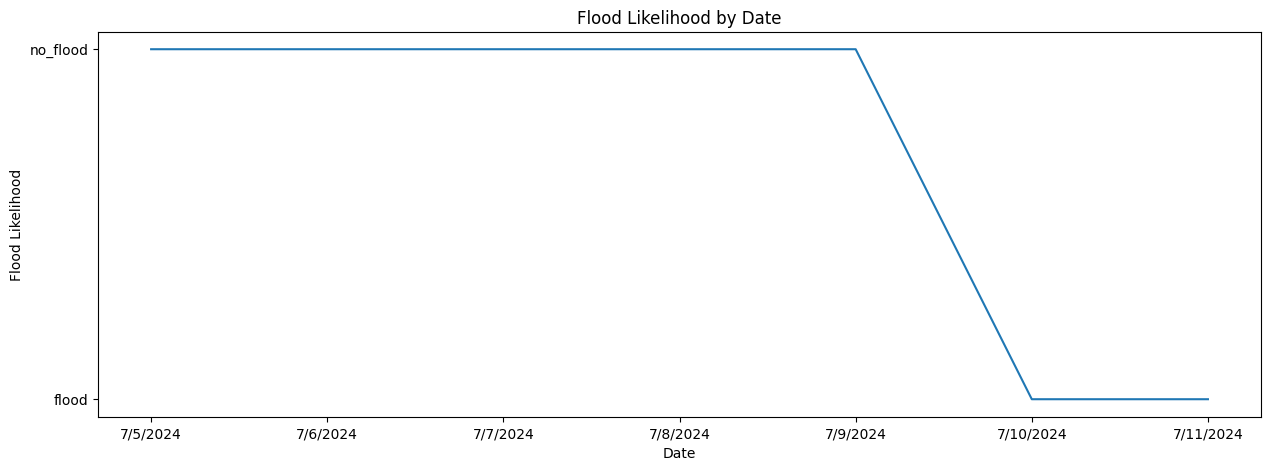

In [ ]:
# plot the graph of flood likelihood against date
plt.figure(figsize=(15,5))
plt.title('Flood Likelihood by Date')
sns.lineplot(x='Date', y='flooding_likelihod', data=new_test_df)

plt.xlabel('Date')
plt.ylabel('Flood Likelihood')
plt.show()

### Conclusion and Rationale

From the model's prediction, the next flooding days in Lagos will be the 10th and 11th July, 2024.

This prediction makes sense for several reasons:

1. The humidity on these days fall within the range of the average humidity of days in which flooding occured in the past.
2. The forecast of temperatures on these days are within the range of the average temperatures of days where flooding happened in the past.
3. The Sea Level Pressure of these two days are forecasted to be higher than the average sea level of days in the past where flooding occured